In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Top contributing features for PC1:
               PC1       PC2
MOPLLAAG  0.234419  0.196158
MINKGEM  -0.232323  0.023885
MZPART   -0.232156 -0.101026
MZFONDS   0.231807  0.101549
MKOOPKLA -0.225369  0.004164
Top contributing features for PC2:
               PC1       PC2
MFALLEEN  0.146072 -0.290774
MFWEKIND -0.086884  0.283073
MGEMOMV  -0.125278  0.276106
MRELGE   -0.169199  0.274874
MRELOV    0.173560 -0.260270


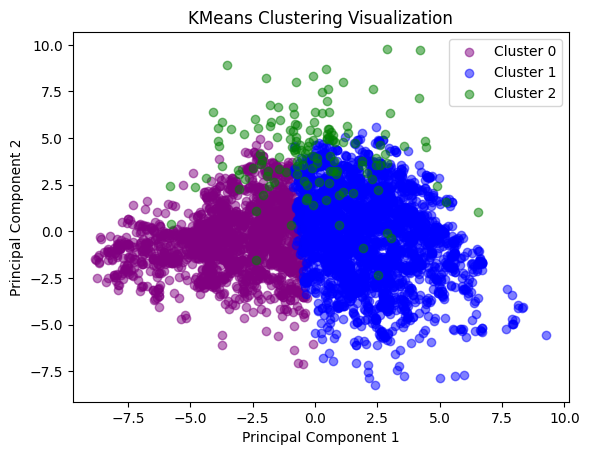

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
train = pd.read_csv("/Users/neeyad/Desktop/432_final/train_features.csv")

# Since the dataset doesn't contain a target column, we'll consider all columns as features
features = train.columns

# Create a pipeline for numerical preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale features
])

# Apply the preprocessing pipeline to the dataset
preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, features)])

data_processed = preprocessor.fit_transform(train)

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to the processed data
kmeans.fit(data_processed)

# Retrieve the cluster assignments
clusters = kmeans.labels_

# Perform PCA to reduce the dimensions
pca = PCA(n_components=2)  # Reduce to two dimensions for plotting
reduced_features = pca.fit_transform(data_processed)

# The components_ attribute of PCA gives the loadings for each principal component
loadings = pca.components_.T
# Create a DataFrame with the loadings and the original feature names
loadings_df = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])

# Now let's see which features contribute most to PC1 and PC2
pc1_loadings = loadings_df.sort_values(by='PC1', key=abs, ascending=False)
pc2_loadings = loadings_df.sort_values(by='PC2', key=abs, ascending=False)

print("Top contributing features for PC1:")
print(pc1_loadings.head())

print("Top contributing features for PC2:")
print(pc2_loadings.head())

# Plot the reduced features with the cluster assignments
colors = ['purple', 'blue', 'green']
for i in range(3):  # Assuming there are three clusters
    plt.scatter(reduced_features[clusters == i, 0], reduced_features[clusters == i, 1], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Visualization')
plt.legend()
plt.show()


Top features for PC1 : Lower level education, Average income, Private health insurance, National Health Service, Purchasing power class
Top features for PC2 : Singles, Household with children, Average size household, Married, Other relation

Cluster 0 correlates with features such as lower level education and reliance on the National Health Service. This cluster's positioning in the lower-left quadrant of the plot suggests its members may not have high purchasing power, potentially making them more sensitive to price when considering products like caravan insurance. The characteristics of this group imply a customer base that might prioritize essential and cost-effective insurance options, possibly due to budgetary constraints. 

Cluster 1 lies in the central to the right region of the plot, hinting at a population with a higher average income and possibly more stable financial footing. This is supported by the cluster's association with features such as private health insurance and higher purchasing power class. The cluster's moderate to high positioning on PC1 suggests that these individuals might have access to better education and may value the security that insurance products provide. 

Cluster 2 is distinctively situated towards the upper middle of the plot, indicating a likely higher prevalence of singles and households with children, as denoted by its positive alignment with features such as singlehood and household size. This cluster's members, differentiable by their higher values on PC2, may exhibit unique insurance needs and lifestyle choices that reflect their personal and familial circumstances. 

In [31]:
import pandas as pd

# Load the mixed dataset
mixed_data = pd.read_csv('/Users/neeyad/Desktop/432_final/caravan.csv')
mixed_data
# # Specify the row number from where you want to cut (Python uses zero-based indexing)
# cut_row_number = 5822  # for example, if you want to cut from row 5822 onwards

# # Slice the DataFrame from the cut_row_number onwards
test_data = mixed_data.iloc[5822:]
test_data
# Save the resulting DataFrame as a CSV file
test_data.to_csv('/Users/neeyad/Desktop/432_final/test_features.csv', index=False)